<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/JDRath/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install required libraries
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch astroquery ipytest

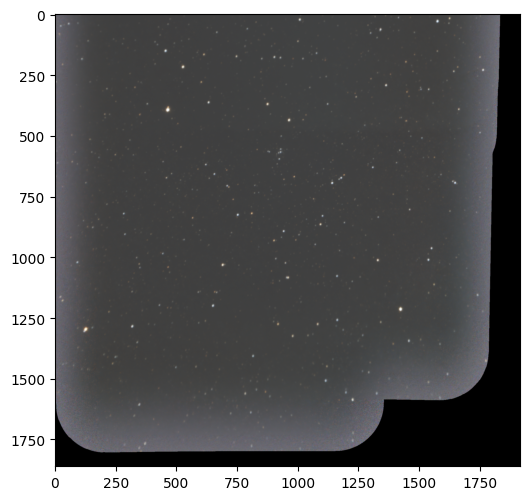

(1861, 1915, 3)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO

# Raw file from github.
fits_url = "https://raw.githubusercontent.com/ubsuny/PHY386/main/data/3up.fits"


response = requests.get(fits_url)
response.raise_for_status()


hdul = fits.open(BytesIO(response.content))
rgb_data = np.transpose(hdul[0].data, (1, 2, 0))
hdul.close()

top_margin = 0
bottom_margin = 0
left_margin = 0
right_margin = 0

#top_margin = 200
#bottom_margin = 550
#left_margin = 250
#right_margin = 350

cropped_rgb = rgb_data[top_margin:rgb_data.shape[0]-bottom_margin,
                       left_margin:rgb_data.shape[1]-right_margin, :]


# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(apply_stretch(cropped_rgb))

plt.show()
cropped_rgb.shape

In [5]:
import pandas as pd
import pandas as pd
from astropy.wcs import WCS
from astropy.stats import mad_std
import photutils.detection as detection
import numpy as np

bkg_sigma = mad_std(np.mean(cropped_rgb, axis = 2))

daofind = detection.DAOStarFinder(fwhm=3.0, threshold=bkg_sigma * 10, min_separation = 15)
sources = daofind(cropped_rgb[:, :,0])

catalog = sources.to_pandas().sort_values('flux', ascending=False).head(10)

catalog


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555
203,204,689.957011,1032.254905,0.381885,-0.384880,0.357339,25,17503,286623,-13.643278,-3.914510
2,3,1574.617965,28.950195,0.422179,-0.389793,0.081294,25,16925,277613,-13.608599,-3.811285
67,68,874.553462,369.861792,0.431257,-0.320068,0.067843,25,15143,241245,-13.456146,-3.743086
140,141,1140.700416,694.836047,0.427393,-0.326790,0.055370,25,14712,224484,-13.377963,-3.802921
198,199,1328.719432,1012.864388,0.437984,-0.017771,0.295429,25,12516,207293,-13.291462,-3.429821


In [72]:
wcs = WCS(hdul[0].header)
print(wcs)

sky_coords = wcs.all_world2pix(catalog['xcentroid'], catalog['ycentroid'], 1, 1)

catalog['ra'] = sky_coords[0]
catalog['dec'] = sky_coords[1]
catalog

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN' 'DEC--TAN' '' 
CRVAL : 25.8111625882977 63.5384206931328 0.0 
CRPIX : 921.0 119.0 0.0 
PC1_1 PC1_2 PC1_3  : 0.999778549767352 0.0211508379531688 0.0 
PC2_1 PC2_2 PC2_3  : -0.0209811457152273 0.999777631225308 0.0 
PC3_1 PC3_2 PC3_3  : 0.0 0.0 1.0 
CDELT : -0.00110883666158442 0.00111216032976206 1.0 
NAXIS : 1915  1861  3


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simple_spectral_class,spectral_label
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,NaN,NaN,HD 11092,K4Ib-IIa,*,6.570,NaN,K,3
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,-71664.900650,6969.070749,NaN,NaN,NaN,NaN,NaN,NaN,5
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,-62431.562905,96877.245510,HD 9811,A6Ia,*,6.528,NaN,A,0
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,NaN,NaN,HD 10755,G5III,*,7.750,NaN,G,2
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,9894.509211,40311.060025,HD 10304,K0,PM*,7.870,NaN,K,3
203,204,689.957011,1032.254905,0.381885,-0.384880,0.357339,25,17503,286623,-13.643278,-3.914510,NaN,NaN,HD 10596,K2,PM*,8.160,NaN,K,3
2,3,1574.617965,28.950195,0.422179,-0.389793,0.081294,25,16925,277613,-13.608599,-3.811285,-139835.296790,75593.651781,HD 9695,B8III,Pu*,7.620,NaN,B,1
67,68,874.553462,369.861792,0.431257,-0.320068,0.067843,25,15143,241245,-13.456146,-3.743086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
140,141,1140.700416,694.836047,0.427393,-0.326790,0.055370,25,14712,224484,-13.377963,-3.802921,NaN,NaN,HD 10125,O9.7II,**,8.280,NaN,O,4
198,199,1328.719432,1012.864388,0.437984,-0.017771,0.295429,25,12516,207293,-13.291462,-3.429821,NaN,NaN,BD+63 212,B5,*,8.650,NaN,B,1


In [80]:
import warnings
from astropy.wcs import WCS
#from astropy.utils.exceptions import FITSFixedWarning # This line is causing the error
import numpy as np

# Instead of filtering for a specific warning, try filtering for all warnings from astropy.wcs
# suppress all warnings from astropy.wcs
warnings.filterwarnings('ignore', module='astropy.wcs')

wcs = WCS(hdul[0].header)

# Assuming the third dimension is represented by a constant value (e.g., 0)
third_dim_value = 0  # or any other relevant index for your data

world = wcs.all_pix2world(
    catalog['xcentroid'],
    catalog['ycentroid'],
    np.full(len(catalog), third_dim_value),
    1,
    ra_dec_order=True,  # ensure the output is (ra, dec)
)
catalog['ra'], catalog['dec'] = world
catalog

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simple_spectral_class,spectral_label
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,27.821613,64.854196,HD 11092,K4Ib-IIa,*,6.570,NaN,K,3
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,26.946785,63.850436,NaN,NaN,NaN,NaN,NaN,NaN,5
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,24.448389,64.738684,HD 9811,A6Ia,*,6.528,NaN,A,0
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,26.791762,63.652856,HD 10755,G5III,*,7.750,NaN,G,2
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,25.688176,63.889659,HD 10304,K0,PM*,7.870,NaN,K,3
203,204,689.957011,1032.254905,0.381885,-0.384880,0.357339,25,17503,286623,-13.643278,-3.914510,26.357441,64.558154,HD 10596,K2,PM*,8.160,NaN,K,3
2,3,1574.617965,28.950195,0.422179,-0.389793,0.081294,25,16925,277613,-13.608599,-3.811285,24.196743,63.413939,HD 9695,B8III,Pu*,7.620,NaN,B,1
67,68,874.553462,369.861792,0.431257,-0.320068,0.067843,25,15143,241245,-13.456146,-3.743086,25.914527,63.818402,NaN,NaN,NaN,NaN,NaN,NaN,5
140,141,1140.700416,694.836047,0.427393,-0.326790,0.055370,25,14712,224484,-13.377963,-3.802921,25.221148,64.172356,HD 10125,O9.7II,**,8.280,NaN,O,4
198,199,1328.719432,1012.864388,0.437984,-0.017771,0.295429,25,12516,207293,-13.291462,-3.429821,24.711950,64.518614,BD+63 212,B5,*,8.650,NaN,B,1


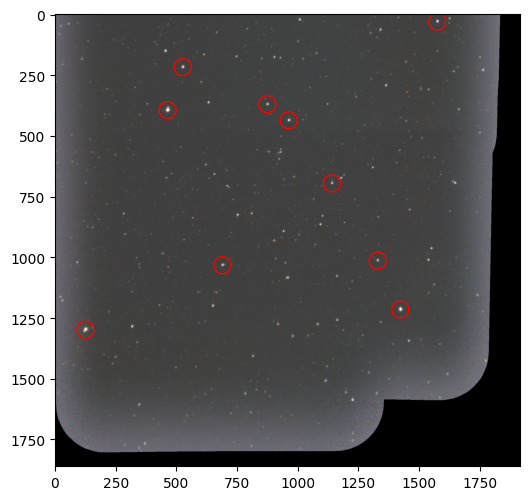

(1861, 1915, 3)

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO

# Raw file from github.
fits_url = "https://raw.githubusercontent.com/ubsuny/PHY386/main/data/3up.fits"


response = requests.get(fits_url)
response.raise_for_status()


hdul = fits.open(BytesIO(response.content))
rgb_data = np.transpose(hdul[0].data, (1, 2, 0))
hdul.close()

top_margin = 0
bottom_margin = 0
left_margin = 0
right_margin = 0

#top_margin = 200
#bottom_margin = 550
#left_margin = 250
#right_margin = 350

cropped_rgb = rgb_data[top_margin:rgb_data.shape[0]-bottom_margin,
                       left_margin:rgb_data.shape[1]-right_margin, :]


# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(apply_stretch(cropped_rgb))

# Use square brackets to access columns in the DataFrame
plt.scatter(catalog['xcentroid'], catalog['ycentroid'], color='red', marker='o', facecolors='none', s=150, label= 'Brightest stars')

plt.show()
cropped_rgb.shape

In [82]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm

options = Simbad.list_votable_fields()

In [83]:
options[options["type"] == "bundle of basic columns"][("name", "description")]

name,description
object,object
coordinates,all fields related with coordinates
dim,"major and minor axis, angle and inclination"
dimensions,all fields related to object dimensions
morphtype,all fields related to the morphological type
parallax,all fields related to parallaxes
propermotions,all fields related with the proper motions
sp,all fields related with the spectral type
velocity,all fields related with radial velocity and redshift


In [95]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u
from tqdm import tqdm

Simbad.ROW_LIMIT = 1
Simbad.reset_votable_fields()
Simbad.add_votable_fields("mesdistance", "V", "sp", "otype", "ids")

for idx, row in tqdm(catalog.iterrows(), total=catalog.shape[0]):
    ra, dec = row['ra'], row['dec']
    coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    print(coord)
    try:
        result = Simbad.query_region(coord, radius="10s")
        if result:
            catalog.at[idx, 'star_name']       = result[0]['main_id']
            catalog.at[idx, 'spectral_type']   = result[0]['sp_type']
            catalog.at[idx, 'object_type']     = result[0]['otype']
            catalog.at[idx, 'visual_mag']      = result[0]['V']

            # safely get the distance, handling cases where it might be missing
            dist = result[0].get('mesdistance_distance', None)
            catalog.at[idx, 'simbad_distance_pc'] = float(dist) if dist is not None else None

    except Exception as e:
        print(f"error querying simbad for {idx}: {e}")

100%|██████████| 10/10 [00:00<00:00, 183.79it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (27.82161272, 64.85419559)>
<SkyCoord (ICRS): (ra, dec) in deg
    (26.94678498, 63.85043597)>
<SkyCoord (ICRS): (ra, dec) in deg
    (24.44838891, 64.73868444)>
<SkyCoord (ICRS): (ra, dec) in deg
    (26.79176233, 63.65285613)>
<SkyCoord (ICRS): (ra, dec) in deg
    (25.68817575, 63.8896587)>
<SkyCoord (ICRS): (ra, dec) in deg
    (26.3574405, 64.5581537)>
<SkyCoord (ICRS): (ra, dec) in deg
    (24.196743, 63.41393851)>
<SkyCoord (ICRS): (ra, dec) in deg
    (25.91452714, 63.81840184)>
<SkyCoord (ICRS): (ra, dec) in deg
    (25.22114774, 64.1723564)>
<SkyCoord (ICRS): (ra, dec) in deg
    (24.71194993, 64.5186144)>


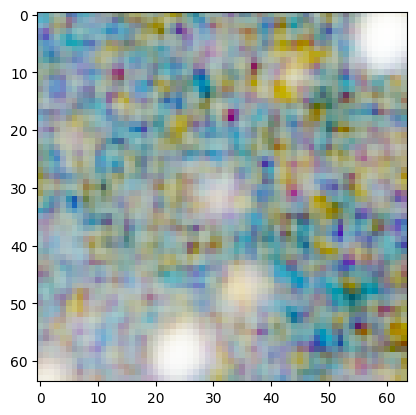

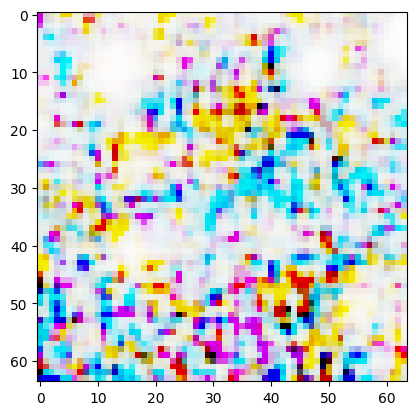

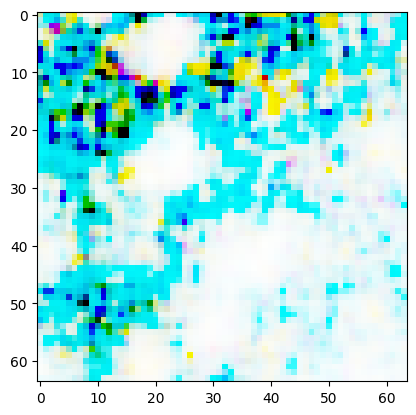

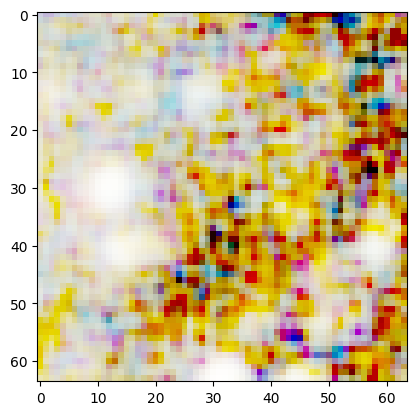

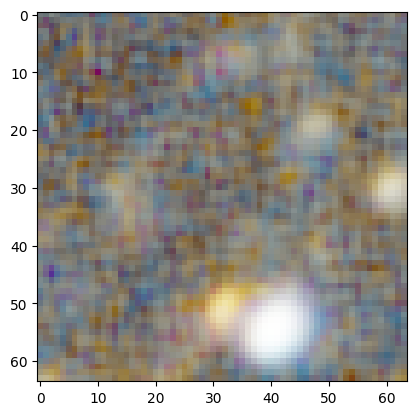

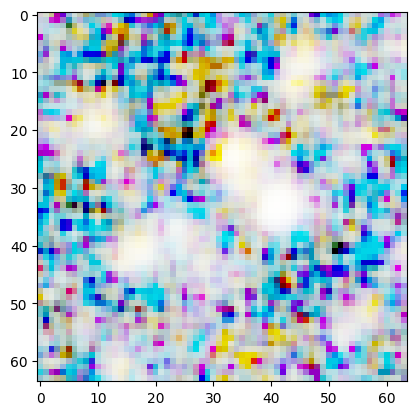

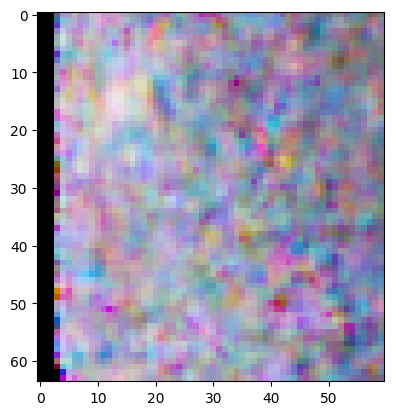

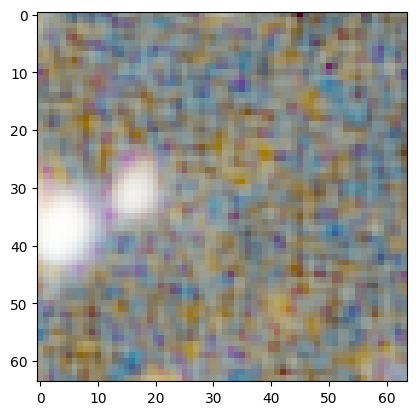

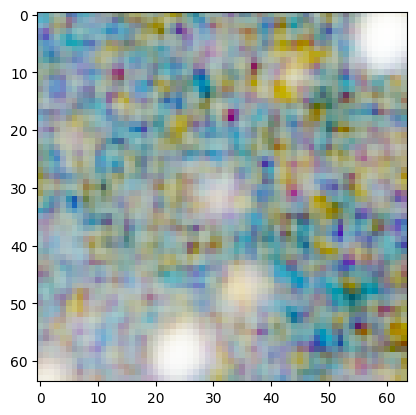

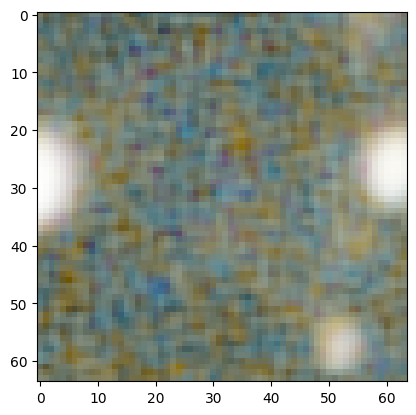

In [103]:
import matplotlib.pyplot as plt

def make_patch(image, x,y, size = 64):
  x_min = int(np.clip(x-size/2, 0, image.shape[0]))
  x_max = int(np.clip(x+size/2, 0, image.shape[0]))
  y_min = int(np.clip(y-size/2, 0, image.shape[1]))
  y_max = int(np.clip(y+size/2, 0, image.shape[1]))
  return image[x_min:x_max, y_min:y_max]

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[0], catalog['ycentroid'].iloc[0])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[1], catalog['ycentroid'].iloc[1])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[2], catalog['ycentroid'].iloc[2])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[3], catalog['ycentroid'].iloc[3])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[4], catalog['ycentroid'].iloc[4])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[5], catalog['ycentroid'].iloc[5])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[6], catalog['ycentroid'].iloc[6])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[8], catalog['ycentroid'].iloc[8])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[0], catalog['ycentroid'].iloc[0])),cmap='gray')
plt.show()

# Access the first row using iloc
plt.imshow(apply_stretch(make_patch(cropped_rgb, catalog['xcentroid'].iloc[9], catalog['ycentroid'].iloc[9])),cmap='gray')
plt.show()

In [87]:
from re import M
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 4

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
catalog['spectral_type'].unique()

array(['K4Ib-IIa', nan, 'A6Ia', 'G5III', 'K0', 'K2', 'B8III', 'O9.7II',
       'B5'], dtype=object)

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

def extract_spectral_class(s):
  """simply spectral class, e.g. M1 -> M"""
  if isinstance(s, str) and len(s) > 0:  # Check if the value is a non-empty string
    return s[0]
  else:
    return np.nan  # Return NaN if not a string or empty

catalog['simple_spectral_class'] = catalog['spectral_type'].apply(extract_spectral_class)
catalog.head()

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simple_spectral_class,spectral_label
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,27.821613,64.854196,HD 11092,K4Ib-IIa,*,6.570,NaN,K,3
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,26.946785,63.850436,NaN,NaN,NaN,NaN,NaN,NaN,5
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,24.448389,64.738684,HD 9811,A6Ia,*,6.528,NaN,A,0
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,26.791762,63.652856,HD 10755,G5III,*,7.750,NaN,G,2
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,25.688176,63.889659,HD 10304,K0,PM*,7.870,NaN,K,3


In [62]:
le = LabelEncoder()
catalog['spectral_label'] = le.fit_transform(catalog['simple_spectral_class'])
catalog.head()

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simple_spectral_class,spectral_label
241,242,125.315384,1298.061986,0.375403,-0.606649,0.396626,25,53870,1005260,-15.005696,-4.760369,27.821613,64.854196,HD 11092,K4Ib-IIa,*,6.570,NaN,K,3
71,72,463.725193,394.021992,0.426999,0.093119,0.167663,25,51860,995584,-14.995195,-4.590671,26.946785,63.850436,NaN,NaN,NaN,NaN,NaN,NaN,5
227,228,1422.506166,1214.768504,0.486563,0.166742,0.588047,25,48598,801240,-14.759407,-4.797200,24.448389,64.738684,HD 9811,A6Ia,*,6.528,NaN,A,0
37,38,526.372276,216.637583,0.452280,-0.340889,0.195442,25,20900,326494,-13.784688,-4.102504,26.791762,63.652856,HD 10755,G5III,*,7.750,NaN,G,2
78,79,963.123118,435.821084,0.447518,-0.450109,0.050269,25,22185,322394,-13.770967,-4.308555,25.688176,63.889659,HD 10304,K0,PM*,7.870,NaN,K,3


In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

def extract_spectral_class(s):
    """Return the spectral class letter (e.g. 'M' from 'M1'), or NaN if invalid."""
    if isinstance(s, str) and len(s) > 0:
        return s[0]
    else:
        return np.nan

# 1. Extract simple class
catalog['simple_spectral_class'] = catalog['spectral_type'].apply(extract_spectral_class)

# 2. Unique classes observed
unique_classes = catalog['simple_spectral_class'].unique()
print("Unique spectral classes:", unique_classes)

# 3. Count missing or malformed spectral types
num_missing = catalog['simple_spectral_class'].isna().sum()
print("Number of missing/simple_spectral_class entries:", num_missing)
if num_missing > 0:
    print("Malformed or missing original spectral_type counts:")
    print(catalog.loc[catalog['simple_spectral_class'].isna(), 'spectral_type']
          .value_counts(dropna=False))

# 4. (Optional) Extract full subclass (letter + digit) if you want finer bins
catalog['spectral_subclass'] = catalog['spectral_type'].str.extract(r'(^[OBAFGKM]\d)')
print("Unique spectral subclasses (letter+digit):",
      catalog['spectral_subclass'].dropna().unique())

# Now you can proceed to encoding or splitting, for example:
le = LabelEncoder()
catalog['class_label'] = le.fit_transform(catalog['simple_spectral_class'].fillna('Unknown'))
y = to_categorical(catalog['class_label'])
X_train, X_test, y_train, y_test = train_test_split(
    catalog.drop(columns=['class_label', 'class_label']), y, test_size=0.2, random_state=42
)

Unique spectral classes: ['K' nan 'A' 'G' 'B' 'O']
Number of missing/simple_spectral_class entries: 2
Malformed or missing original spectral_type counts:
spectral_type
NaN    2
Name: count, dtype: int64
Unique spectral subclasses (letter+digit): ['K4' 'A6' 'G5' 'K0' 'K2' 'B8' 'O9' 'B5']


In [91]:
patches = []
for _, row in catalog.iterrows():
  patch = make_patch(cropped_rgb, row['xcentroid'], row['ycentroid'])
  # Ensure all patches have the same shape by resizing or padding
  patch = patch[:64, :64, :]  # Adjust if your desired shape is different
  # Pad if patch is smaller than 64x64
  if patch.shape[0] < 64 or patch.shape[1] < 64:
    pad_height = 64 - patch.shape[0]
    pad_width = 64 - patch.shape[1]
    patch = np.pad(patch, ((0, pad_height), (0, pad_width), (0, 0)), 'constant')
  patches.append(patch)

x = np.array(patches)[..., np.newaxis]
y = catalog['spectral_label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 1865.8250 - val_accuracy: 0.0000e+00 - val_loss: 8076.7451
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.3750 - loss: 2156.2175 - val_accuracy: 0.0000e+00 - val_loss: 8049.6147
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.2500 - loss: 2437.9683 - val_accuracy: 0.0000e+00 - val_loss: 5755.8560
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.1250 - loss: 1708.6600 - val_accuracy: 0.5000 - val_loss: 5167.8540
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.1250 - loss: 2353.0505 - val_accuracy: 0.5000 - val_loss: 3778.1028
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.1250 - loss: 1013.9173 - val_accuracy: 0.0000e+00 - val_loss: 3570.0051
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.1250 - loss: 731.4544 - val_accuracy: 0.0000e+00 - val_loss: 3238.1267
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accu

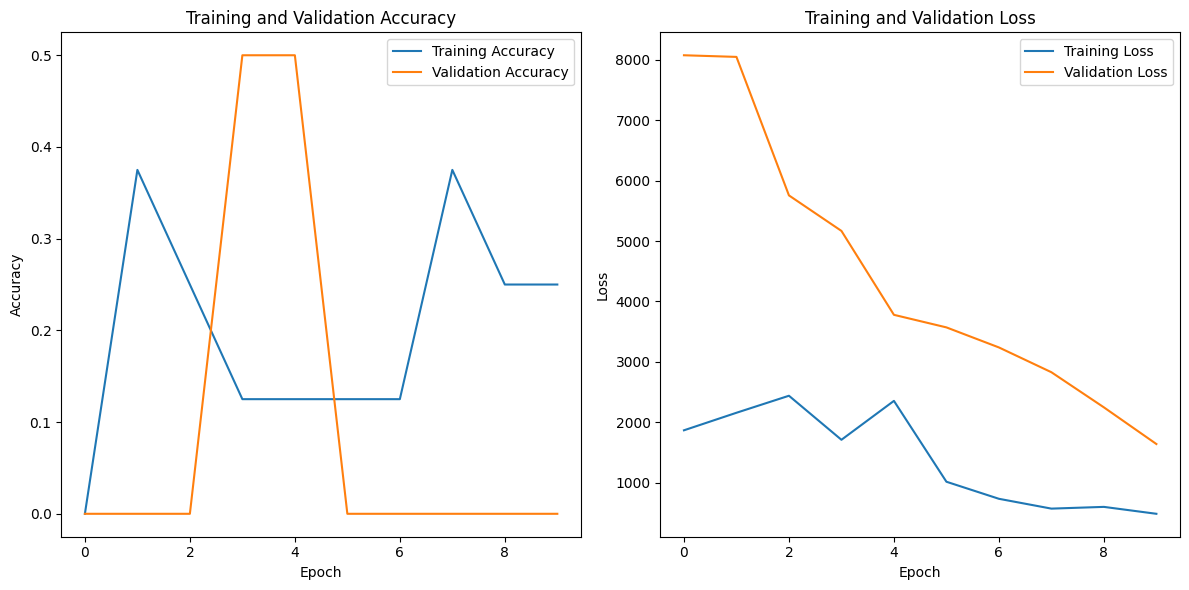

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Define the model using Input layer for input shape
model = Sequential([
    Input(shape=(64, 64, 3)),  # Define input shape here using Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Number of classes (spectral labels)
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()